In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import lightkurve as lk
# from scipy.optimize import curve_fit

# from astropy.convolution import Gaussian1DKernel
# from astropy.convolution import convolve
sys.path.insert(0, "../")

from michael import janet

Hi there. Welcome to the good place.


In [2]:
uni = pd.read_csv("/Users/oliver hall/Research/unicorn/data/unicorn.csv", index_col=0)

Index 258 is a good tester. Clear rotational signal, ambiguous peak mode.

In [3]:
j = janet.boot(uni, index=24)

Already have data downloaded for Gaia ID 3296334520042680064.
If you want to check for new data, run `janet.update()`.
No postcard object will be created for this target.
### Running Simple Astropy Lomb-Scargle on Sector 5 on star 3296334520042680064 ###
### Completed Simple Astropy Lomb-Scargle for Sector 5 on star 3296334520042680064 ###
### Saved results ###
### Running Simple Astropy Lomb-Scargle on Sector 32 on star 3296334520042680064 ###
### Completed Simple Astropy Lomb-Scargle for Sector 32 on star 3296334520042680064 ###
### Saved results ###
### Running Wavelet Estimation on star 3296334520042680064 ###


/Users/Anaconda/anaconda3/envs/michael/lib/python3.8/site-packages/jazz_hands-0.0.3-py3.8.egg/jazzhands/wavelets.py:488: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/77 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

### Completed Wavelet Estimation on star 3296334520042680064 ###
### Saved results ###
### Running ACF Estimation on star 3296334520042680064 ###
### Completed ACF Estimation on star 3296334520042680064 ###
### Saved results ###
### Saved results ###
### Saved results ###
### Saved results ###
### Saved results ###
### Saved results ###


/Users/oliver hall/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/Users/oliver hall/Research/michael/Examples/../michael/plotting.py:333: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f'{j.output_path}/{j.gaiaid}/output.pdf', rasterized=True)



------ Decoding Overall Period Flag 129 ------
128: The ACF period does not match the 'best' period within 2 sigma.
1: Best rotation is from the Simple Lomb Scargle (SLS) method.

No other flags raised. 

### Saved results ###


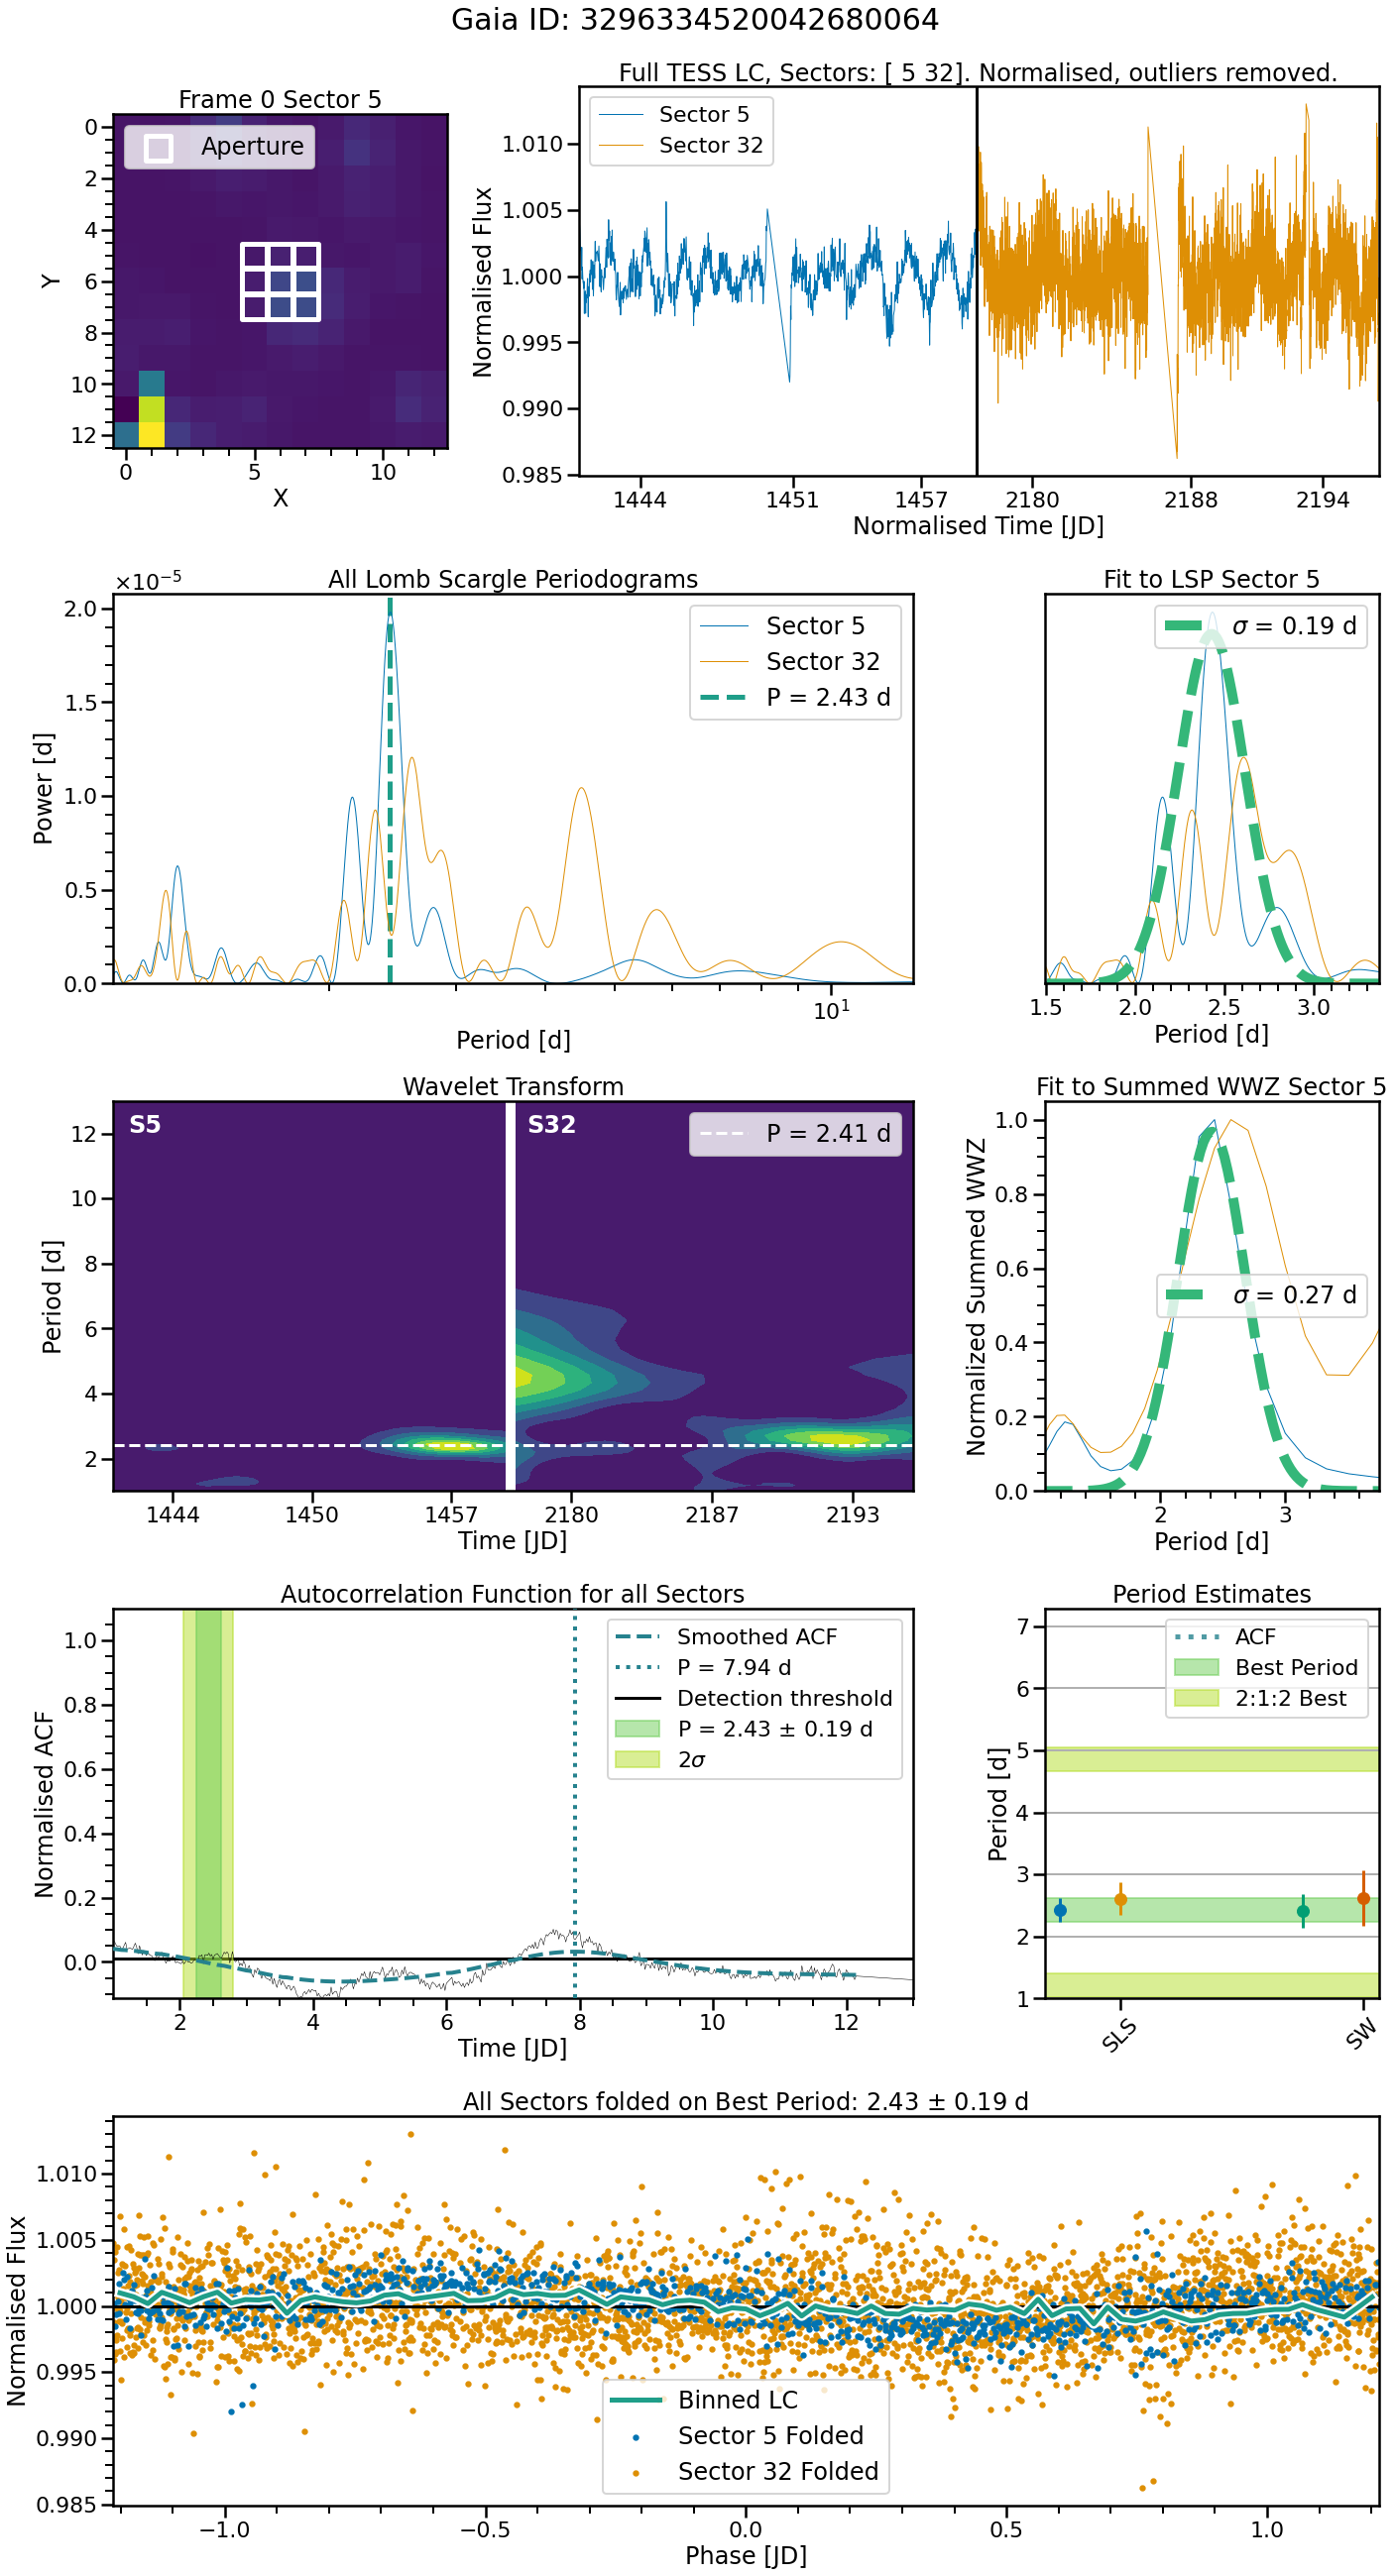

In [4]:
j.run(period_range = (1, 13))

In [5]:
j.results

,SLS,e_SLS,f_SLS,SW,e_SW,ACF,s_SLS,s_SW,overall,e_overall,f_overall
5,2.428697,0.186747,0.0,2.41144,0.268079,NaN,NaN,NaN,NaN,NaN,NaN
32,2.607323,0.260732,0.0,2.61744,0.452918,NaN,NaN,NaN,NaN,NaN,NaN
all,NaN,NaN,NaN,NaN,NaN,7.937725,NaN,NaN,NaN,NaN,NaN
best,2.428697,0.186747,0.0,2.41144,0.268079,NaN,5,5,2.428697,0.186747,129.0


In [15]:
list(j.void)

['datum_5',
 'clc_5',
 'datum_32',
 'clc_32',
 'clc_all',
 'pg_5',
 'p_5',
 'P_5',
 'popt_5',
 'pg_32',
 'p_32',
 'P_32',
 'popt_32',
 '5_wt',
 '5_wwz',
 '5_wwa',
 '5_wavelet_popt',
 '32_wt',
 '32_wwz',
 '32_wwa',
 '32_wavelet_popt',
 'acflc',
 'redacflc',
 'acfsmoo',
 'peaks']

Adding new features

In [65]:
    clc = j.void['clc_all']

    # Calculate the ACF between 0 and 12 days.
    acf = np.correlate(clc.flux.value-1, clc.flux.value-1, mode='full')[len(clc)-1:]
    lag = clc.time.value - clc.time.value.min()

    # Cut up and normalize the ACF
    secmin = j.sectors[0]
    norm_acf = np.abs(acf**2) / np.abs(acf[0]**2)
    acflc = lk.LightCurve(time=lag, flux=norm_acf)
    acflc = acflc[acflc.time.value < (j.void[f'clc_{secmin}'].time.value - j.void[f'clc_{secmin}'].time.value.min()).max()]

    # Estimate a first-guess period
    acfpg = acflc.to_periodogram()
    first_guess = acfpg.period_at_max_power

In [ ]:
acf.max()

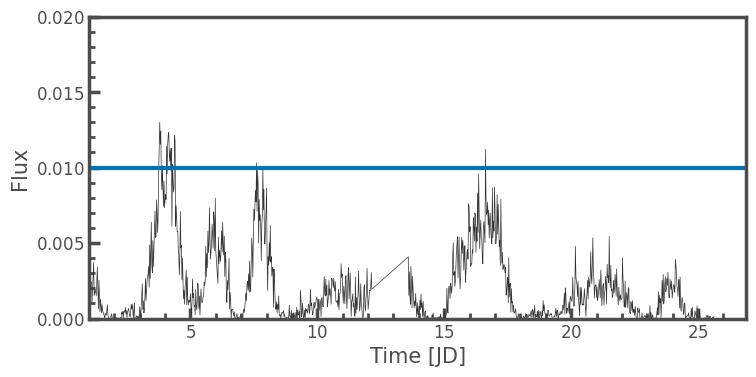

In [81]:
acflc.plot()
plt.xlim(1)
plt.ylim(0, 0.02)
plt.axhline(0.01)

In [13]:
j.results

,SLS,e_SLS,f_SLS,SW,e_SW,ACF,s_SLS,s_SW,overall,e_overall,f_overall
5,2.428697,0.186747,0.0,2.41144,0.268079,NaN,NaN,NaN,NaN,NaN,NaN
32,2.607323,0.260732,0.0,2.61744,0.452918,NaN,NaN,NaN,NaN,NaN,NaN
all,NaN,NaN,NaN,NaN,NaN,7.937725,NaN,NaN,NaN,NaN,NaN
best,2.428697,0.186747,0.0,2.41144,0.268079,NaN,5,5,2.428697,0.186747,129.0


In [14]:
import numpy as np
import lightkurve as lk
import matplotlib.pyplot as plt

import pymc3 as pm

AttributeError: module 'arviz' has no attribute 'geweke'

In [ ]:
acfsmoo = j.void['acfsmoo']
wt = j.void['wt']
nus = wt.nus
wwz = j.void['wwz']

In [ ]:
acfsmoolc = lk.LightCurve(time = j.void['acflc'].time.value, flux = acfsmoo)

In [ ]:
Model = pm.Model()
P = acfsmoolc.time.value
F = acfsmoolc.flux.value

with Model:
    A0 = pm.Uniform('A0', 0., 1., testval=0.05)
    A1 = pm.Uniform('A1', 0., 10., testval=0.5)
    yy = pm.Deterministic('yy', (1-A0)*np.exp(-P/A1) + A0)
    y = pm.Normal('like', mu=yy, sigma = np.std(F),
                 observed=F)

In [ ]:
with Model:
    trace = pm.sample()

In [ ]:
yy = np.median(trace['yy'], axis=0)
normacf = acfsmoolc - yy

In [ ]:
binned = normacf.bin()